In [1]:
import numpy as np
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from config import config

In [2]:
def read_mongo(collection, query={}):
    """ Read from Mongo and Store into DataFrame """

    # Make a query to the specific DB and Collection
    cursor = collection.find(query)
    
    elements = []
    for doc in cursor:
        del doc['_id']
        elements.append(doc)
        
    # Expand the cursor and construct the DataFrame
    df =  pd.DataFrame(elements)
    
    return df

In [3]:
REPO = 'jabref/jabref'

In [4]:
mongoClient = pymongo.MongoClient(config['DATABASE']['CONNECTION_STRING'])
db = mongoClient[config['DATABASE']['NAME']]
collection = db[f'{REPO}_results']

lastIssue = collection.find().sort('number', -1).limit(1)[0]['number']

df = read_mongo(collection, {'number': {'$gte': lastIssue - 6000}})
df.head()

,compare,filtros,number,tecnica,topk,acertos,arquivos,arquivos_resolvidos_de_verdade,arquivos_sugeridos,data,erros,issue,mapk,max_sim,mediana_sim,min_sim,repositorio
0,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",3971,tfidf,5,0,4,[src/main/java/org/jabref/logic/help/HelpFile....,[src/main/java/net/sf/jabref/gui/importer/fetc...,2018-04-29T12:18:50Z,43,Add RFC Standard Fetcher,0.0,0.218712,0.166119,0.00000,jabref/jabref
1,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4233,tfidf,5,0,5,[src/main/java/org/jabref/gui/collab/ChangeSca...,"[src/main/java/org/jabref/gui/BasePanel.java, ...",2018-08-23T17:05:07Z,64,Nullpointerexception while merging entries,0.0,0.217365,0.144060,0.12526,jabref/jabref
2,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4113,tfidf,5,0,2,[src/main/java/org/jabref/logic/integrity/Page...,[src/main/java/net/sf/jabref/gui/openoffice/OO...,2018-11-20T07:43:58Z,15,Improve check for page numbers,0.0,0.208106,0.098549,0.00000,jabref/jabref
3,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4622,tfidf,5,7,7,[src/main/java/org/jabref/gui/JabRefFrame.java...,"[src/main/java/net/sf/jabref/JabRefMain.java, ...",2019-02-01T15:08:01Z,86,Reset preferences throws not on FX Thread exce...,0.4,0.307038,0.159928,0.00000,jabref/jabref
4,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4591,tfidf,5,0,3,[src/main/java/org/jabref/logic/integrity/Edit...,[src/main/java/org/jabref/logic/integrity/Page...,2019-02-13T06:05:54Z,20,Add check for books with first edition,0.0,0.172627,0.157353,0.14016,jabref/jabref


# Histplot


<AxesSubplot: xlabel='number', ylabel='Count'>

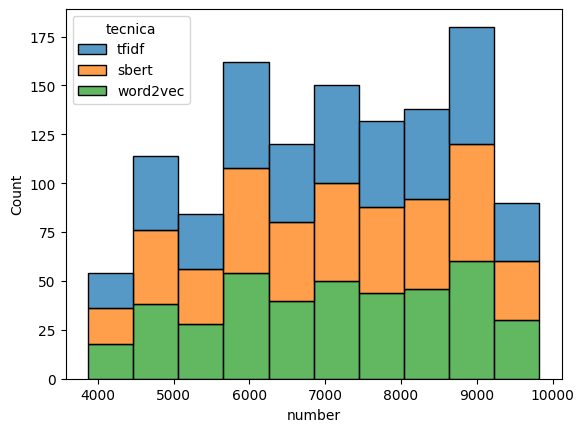

In [5]:
sns.histplot(df, x='number', bins=10, stat='count', hue='tecnica', multiple='stack')

# Mapk

<AxesSubplot: xlabel='topk', ylabel='mapk'>

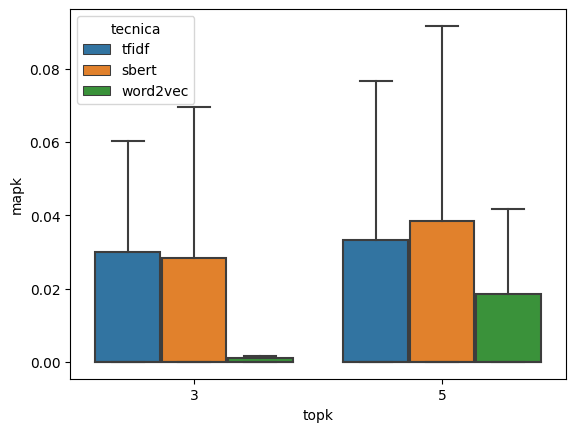

In [12]:
sns.boxplot(df, x="topk", y="mapk", hue="tecnica", showfliers=False)

# Similaridades maiores

<AxesSubplot: xlabel='topk', ylabel='max_sim'>

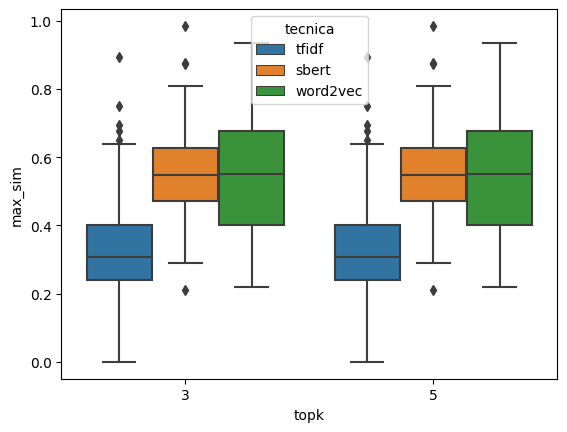

In [7]:
sns.boxplot(df, x="topk", y="max_sim", hue="tecnica")

# Similaridades menores

<AxesSubplot: xlabel='topk', ylabel='min_sim'>

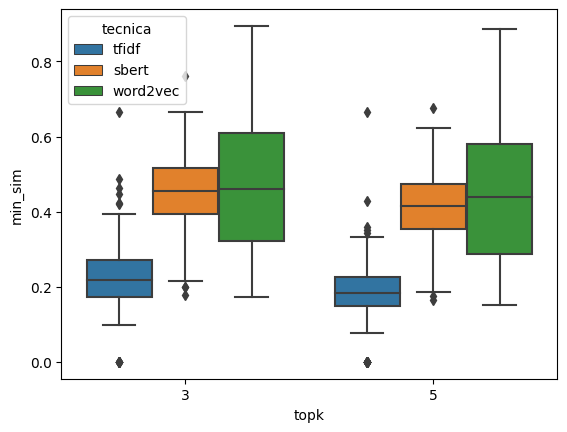

In [8]:
sns.boxplot(df, x="topk", y="min_sim", hue="tecnica")

# Acertos

<AxesSubplot: xlabel='topk', ylabel='acertos'>

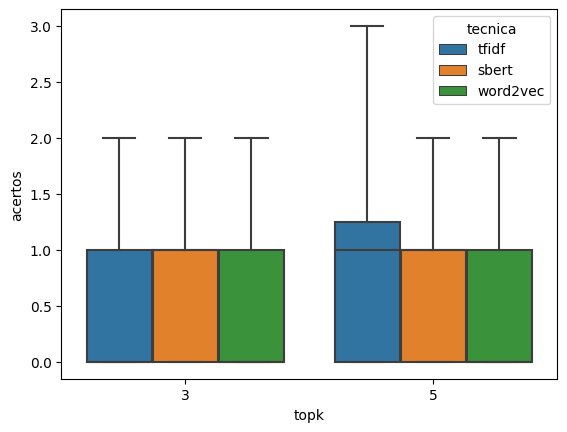

In [9]:
sns.boxplot(df, x="topk", y="acertos", hue="tecnica", showfliers=False)

<AxesSubplot: xlabel='topk', ylabel='acertos'>

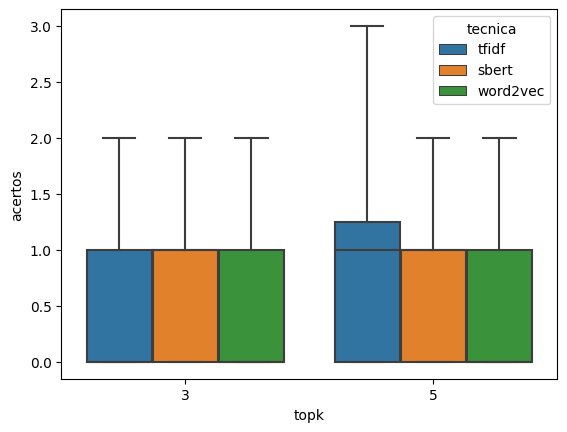

In [11]:
sns.boxplot(df, x="topk", y="acertos", hue="tecnica", showfliers=False)